# Car Price Predication

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\djerb\\Downloads\\Car Price Prediction\\Car Price Prediction\\Car Price Prediction.csv')

# 1. Explore the data

In [5]:
df.shape

(205, 26)

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [12]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [13]:
#replace the text values with numbers
df['doornumber'].replace('two',2,inplace=True)
df['doornumber'].replace('four',4,inplace=True)
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [14]:
df['carbody'].unique()
df['drivewheel'].unique()
df['enginelocation'].unique()
df['wheelbase'].unique()
df['carlength'].unique()
df['carwidth'].unique()
df['carheight'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [15]:
def unique(x):
    return df[x].unique()

In [16]:
unique('curbweight')
unique('cylindernumber')

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [17]:

df['cylindernumber'].replace('four',4,inplace=True)
df['cylindernumber'].replace('six',6,inplace=True)
df['cylindernumber'].replace('five',5,inplace=True)
df['cylindernumber'].replace('three',3,inplace=True)
df['cylindernumber'].replace('twelve',12,inplace=True)
df['cylindernumber'].replace('two',2,inplace=True)
df['cylindernumber'].replace('eight',8,inplace=True)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [18]:
unique('enginesize')
unique('fuelsystem')
unique('boreratio')
unique('stroke')
unique('compressionratio')
unique('horsepower')
unique('peakrpm')
unique('citympg')
unique('highwaympg')
unique('price')

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

# 2. Data Preprocessing.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [20]:
# check for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
# check for duplicates
df.duplicated().sum()

0

In [22]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [23]:
# statistical analysis
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: >

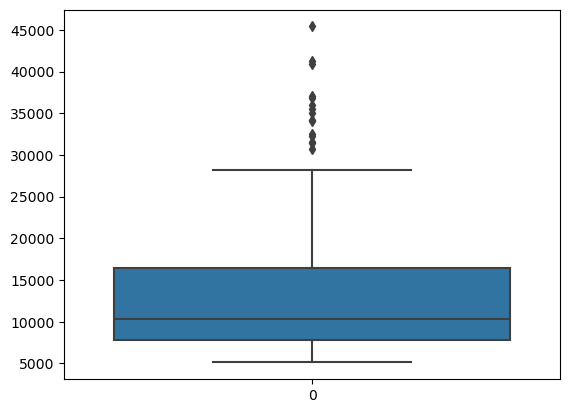

In [24]:
#check for outliers
sns.boxplot(data=df['price'])
# ouliers are there, but not removing it.

In [25]:
df.columns
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
#Encode the categorical datas from the dataset. For Ml Model generation

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [28]:
#Encoding using Label Encoder
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [29]:
label.fit(df.fueltype)
df.fueltype=label.transform(df.fueltype)

In [30]:
label.fit(df.aspiration)
df.aspiration=label.transform(df.aspiration)

In [31]:
label.fit(df.carbody)
df.carbody=label.transform(df.carbody)

In [32]:
label.fit(df.drivewheel)
df.drivewheel=label.transform(df.drivewheel)

In [33]:
label.fit(df.enginelocation)
df.enginelocation=label.transform(df.enginelocation)

In [34]:
label.fit(df.enginetype)
df.enginetype=label.transform(df.enginetype)

In [35]:
label.fit(df.fuelsystem)
df.fuelsystem=label.transform(df.fuelsystem)

In [36]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [38]:
# check the correlation between 'price' and independent variables

In [39]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

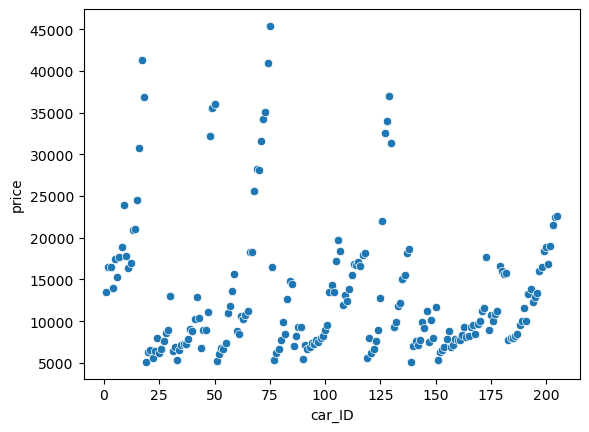

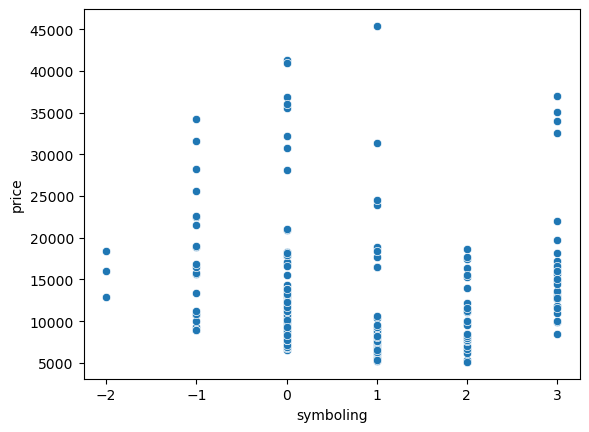

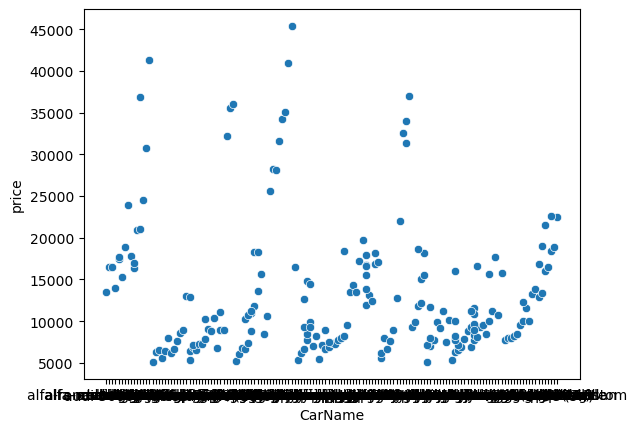

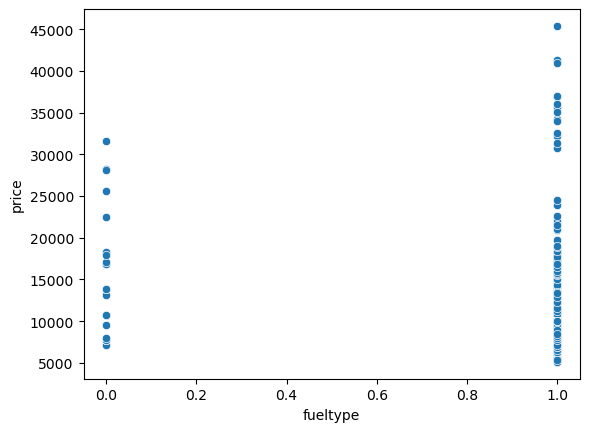

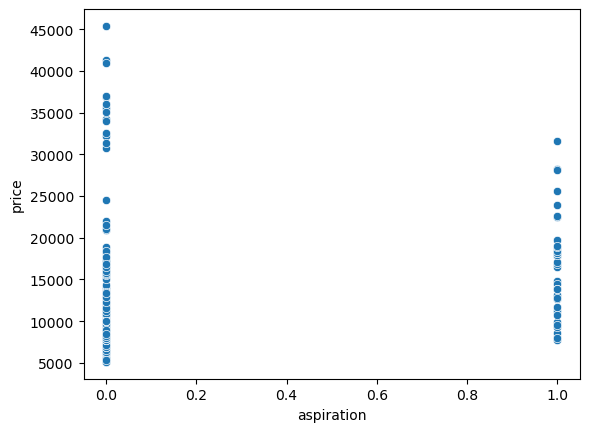

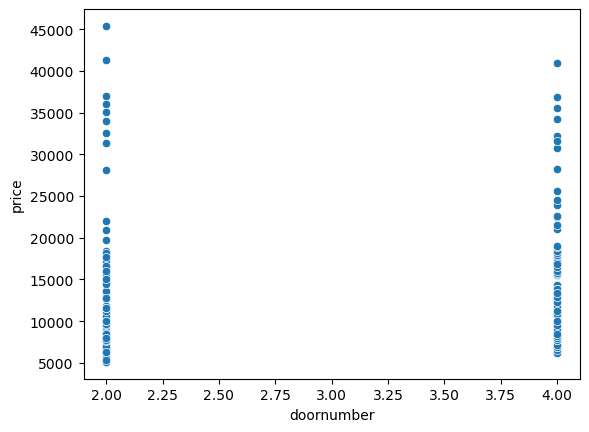

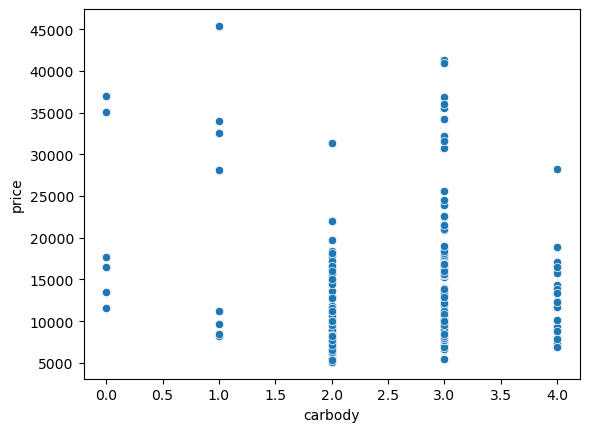

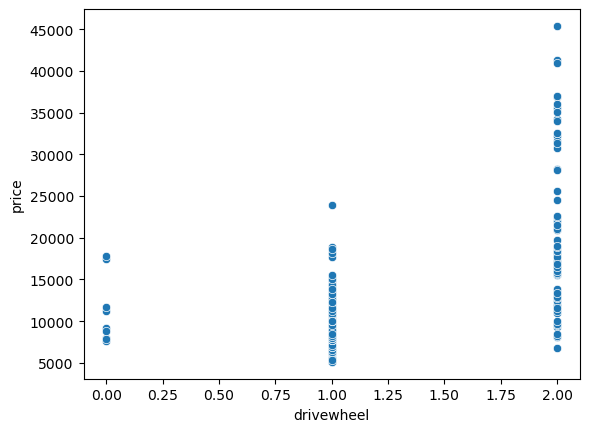

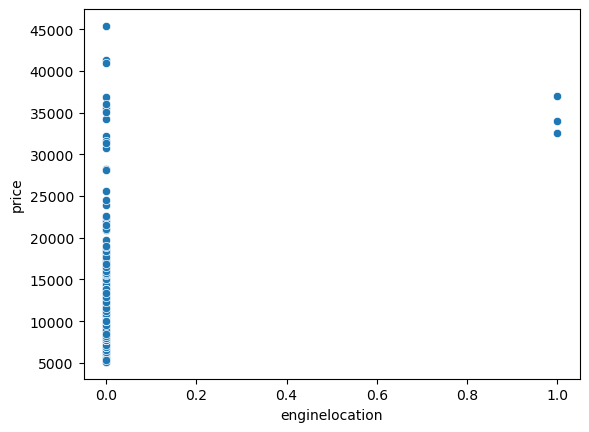

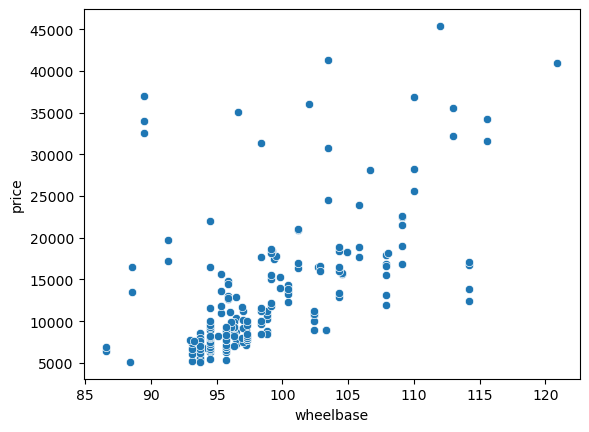

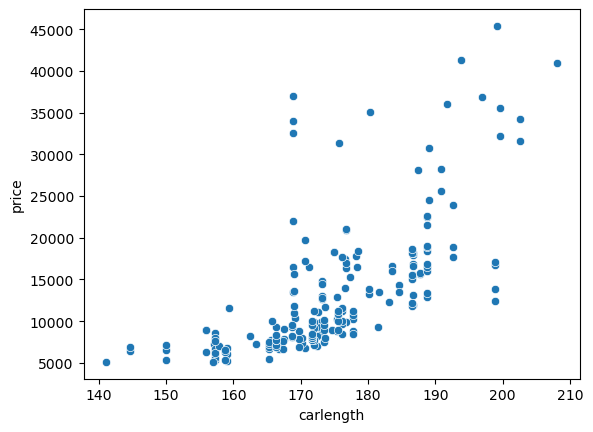

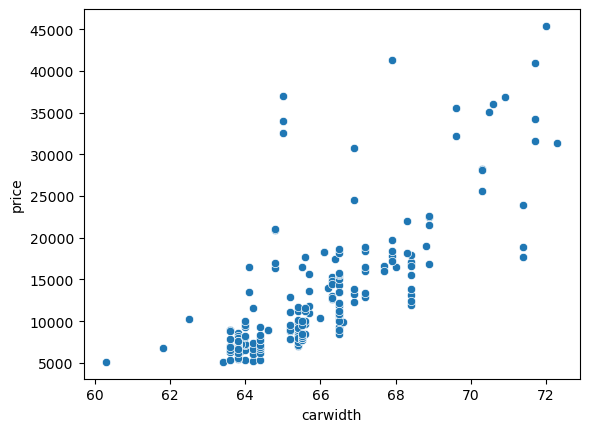

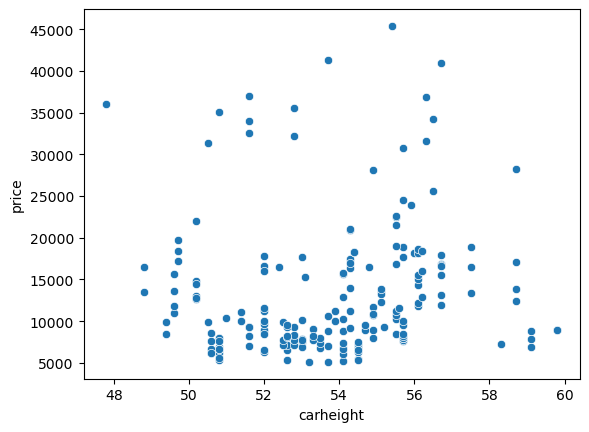

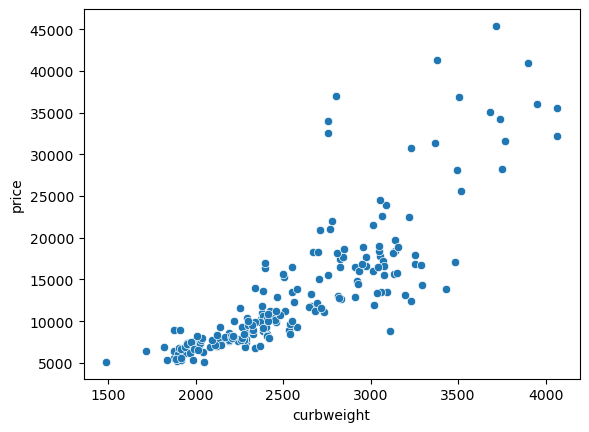

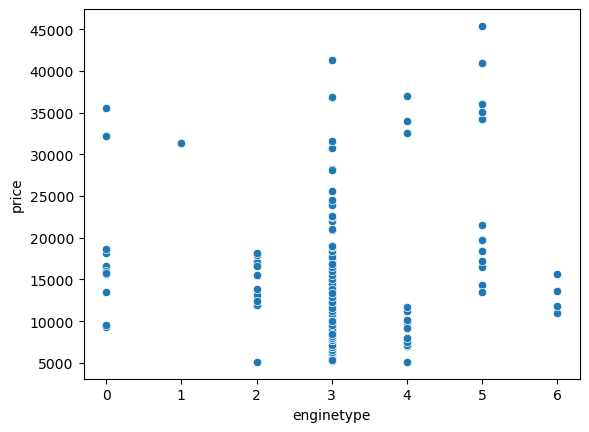

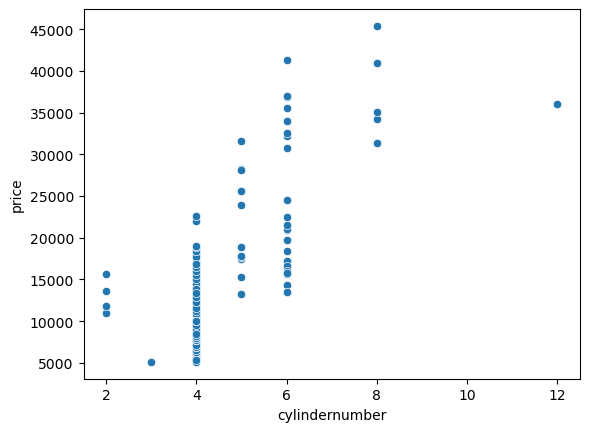

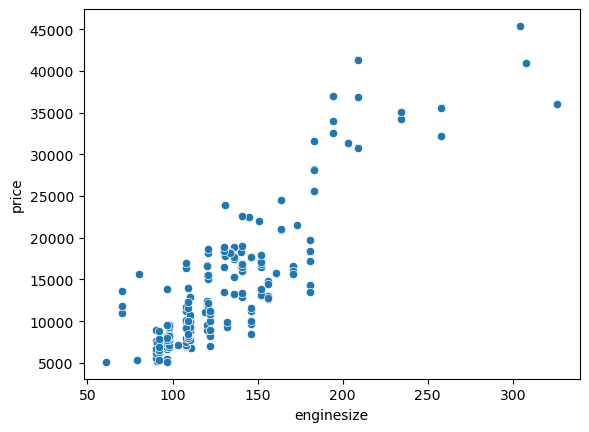

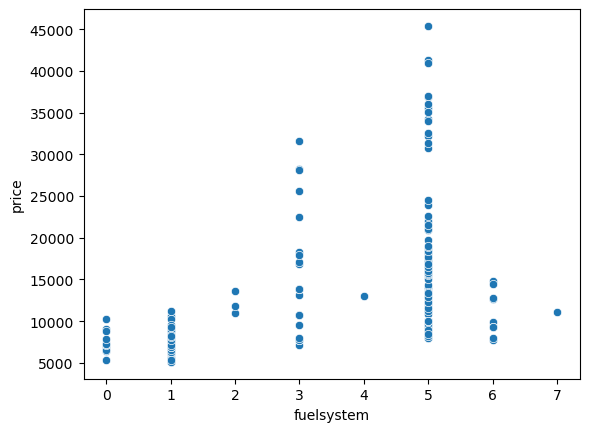

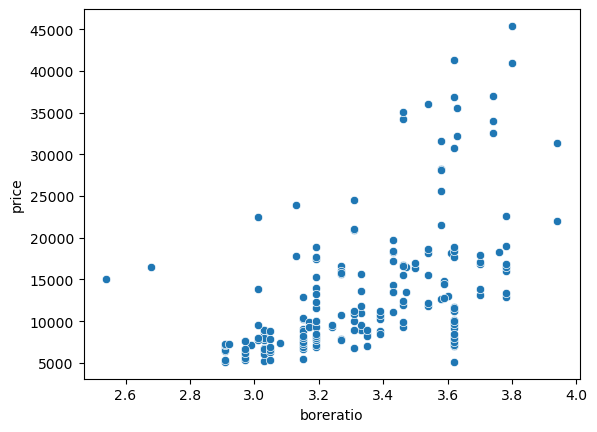

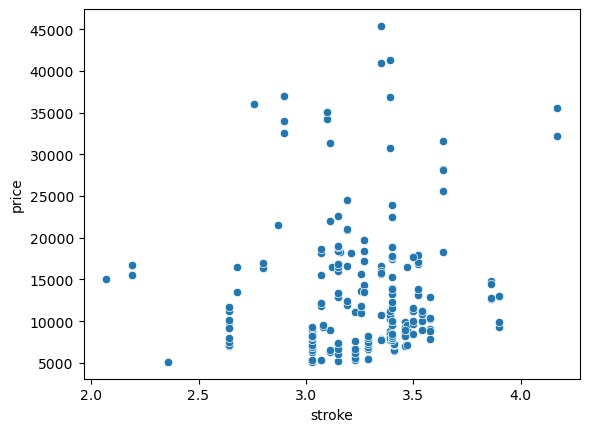

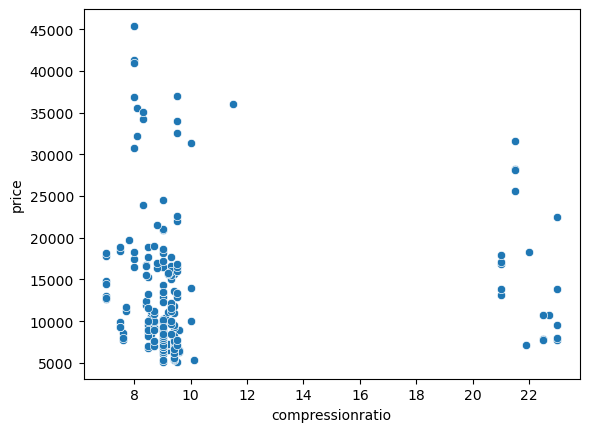

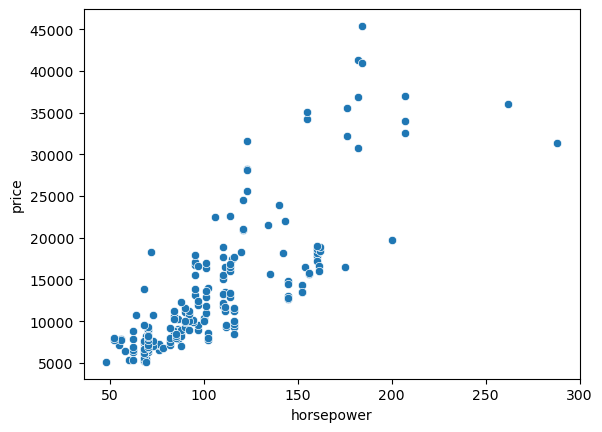

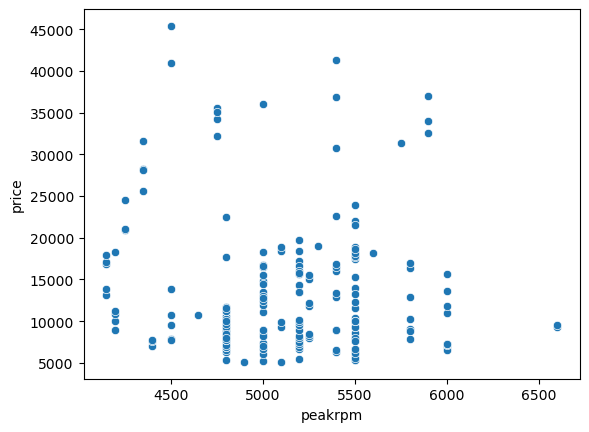

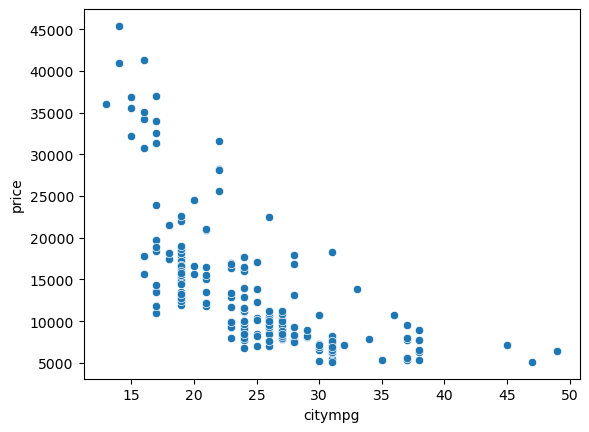

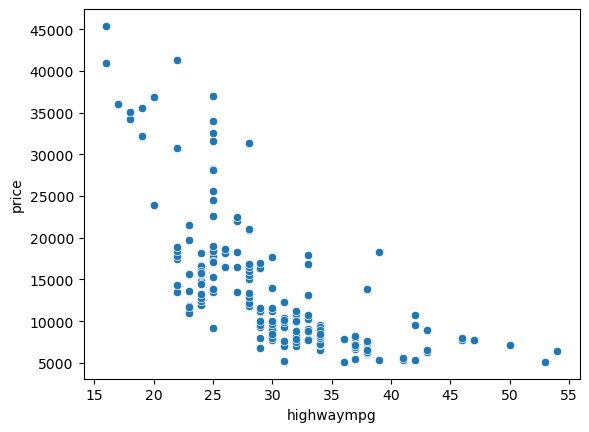

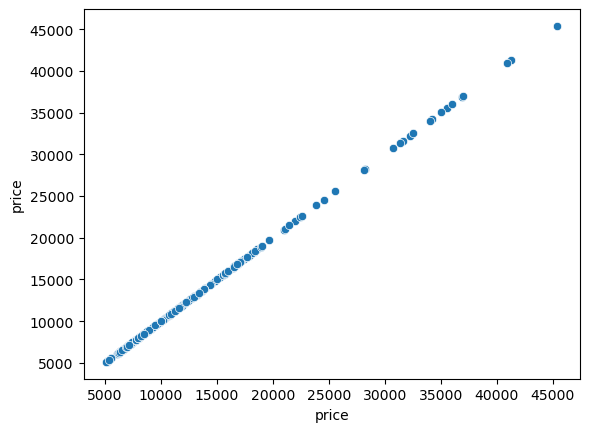

In [40]:
# Creating scatter plots for each numerical column against 'price'
for col in df:
    sns.scatterplot(data=df, x=col, y='price')
    plt.show()

In [41]:
# plot a heatmap to show the correlation among numerical variables.

In [43]:
# Create a correlation matrix between numerical columns
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'alfa-romero giulia'

## Observations from scatter plot and heatmap
The independent variables that affects the price of car are,
1. 'drivewheel'
2. 'wheelbase'
3. 'carlength'
4. 'carwidth'
5. 'curbweight' 
6. 'cylindernumber' 
7. 'enginesize'
8. 'fuelsystem'
9. 'boreratio'
10. 'horsepower'
11. 'citympg' (negative correlation)
12. 'highwaympg' (negative correlation)

In [44]:
#sort the dataset with the necessary features only.
columns_to_sort=['drivewheel','wheelbase','carlength','carwidth',
                 'curbweight','cylindernumber','enginesize','fuelsystem','boreratio','horsepower','citympg','highwaympg']

In [45]:
independent_data_for_model=df[columns_to_sort]
independent_data_for_model.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
1,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
2,2,94.5,171.2,65.5,2823,6,152,5,2.68,154,19,26
3,1,99.8,176.6,66.2,2337,4,109,5,3.19,102,24,30
4,0,99.4,176.6,66.4,2824,5,136,5,3.19,115,18,22


## Create a ML model for Car Price Prediction using Linear Regression-Multiple Variables
The independent variables that affects the price of car are,
1. 'drivewheel'
2. 'wheelbase'
3. 'carlength'
4. 'carwidth'
5. 'curbweight' 
6. 'cylindernumber' 
7. 'enginesize'
8. 'fuelsystem'
9. 'boreratio'
10. 'horsepower'
11. 'citympg' (negative correlation)
12. 'highwaympg' (negative correlation)

In [46]:
#Using Linear Regression Model

In [47]:
#spliting the dataset to x(independent variables) and y(dependent variable='Price')
x=df[['drivewheel','wheelbase','carlength','carwidth',
                 'curbweight','cylindernumber','enginesize','fuelsystem','boreratio','horsepower','citympg','highwaympg']]
y=df.price

In [48]:
#independant variable,x
x

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
1,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27
2,2,94.5,171.2,65.5,2823,6,152,5,2.68,154,19,26
3,1,99.8,176.6,66.2,2337,4,109,5,3.19,102,24,30
4,0,99.4,176.6,66.4,2824,5,136,5,3.19,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,4,141,5,3.78,114,23,28
201,2,109.1,188.8,68.8,3049,4,141,5,3.78,160,19,25
202,2,109.1,188.8,68.9,3012,6,173,5,3.58,134,18,23
203,2,109.1,188.8,68.9,3217,6,145,3,3.01,106,26,27


In [49]:
#dependant variable,y
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [50]:
#import libraries
from sklearn.linear_model import LinearRegression

In [51]:
linre=LinearRegression()
linre

LinearRegression()

In [52]:
linre.fit(x,y)

LinearRegression()

In [53]:
#predict the price
value=[[2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27]]
predicted=linre.predict(value)
print(predicted)

[13039.64047938]


C:\Users\djerb\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
#check the Accuracy of created ML model
linre.score(x,y)

0.830484708905505

In [55]:
x.head(1)

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,21,27


In [56]:
y.head(1)

0    13495.0
Name: price, dtype: float64

# Result analysis
1. The Score of created ML model is good.
2. The predicted value lies closer to the actual value, So The created ML model is working good.

# 2- Investigation of the Diamond Dataset

In [59]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [61]:
diamonds = pd.read_csv('C:/Users/djerb/Downloads/Diamonds/Diamonds/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
diamonds["size"] = diamonds["x"] * diamonds["y"] * diamonds["z"]
col_names = ['price','carat', 'size', 'depth', 'table', 'color', 'clarity', 'cut']
diamonds = diamonds[col_names]
diamonds.head()

,price,carat,size,depth,table,color,clarity,cut
0,326,0.23,38.202030,61.5,55.0,E,SI2,Ideal
1,326,0.21,34.505856,59.8,61.0,E,SI1,Premium
2,327,0.23,38.076885,56.9,65.0,E,VS1,Good
3,334,0.29,46.724580,62.4,58.0,I,VS2,Premium
4,335,0.31,51.917250,63.3,58.0,J,SI2,Good


In [63]:
#Encoding categorical features
encoder = LabelEncoder()

encoder.fit(diamonds['cut'])
diamonds['cut'] = encoder.transform(diamonds['cut'])

encoder.fit(diamonds['color'])
diamonds['color'] = encoder.transform(diamonds['color'])

encoder.fit(diamonds['clarity'])
diamonds['clarity'] = encoder.transform(diamonds['clarity'])

diamonds.head()

,price,carat,size,depth,table,color,clarity,cut
0,326,0.23,38.202030,61.5,55.0,1,3,2
1,326,0.21,34.505856,59.8,61.0,1,2,3
2,327,0.23,38.076885,56.9,65.0,1,4,1
3,334,0.29,46.724580,62.4,58.0,5,5,3
4,335,0.31,51.917250,63.3,58.0,6,3,1


In [64]:
#Split dataset in train and test Data
df = diamonds.copy()

#"cut" is my predictor variable
X = df.drop('cut',axis=1)

#Label or target variable
y = df['cut']

#Define the split in Training/Test and their proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X_train.shape, y_train.shape)

(43152, 7) (43152,)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   size     53940 non-null  float64
 3   depth    53940 non-null  float64
 4   table    53940 non-null  float64
 5   color    53940 non-null  int32  
 6   clarity  53940 non-null  int32  
 7   cut      53940 non-null  int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 2.7 MB


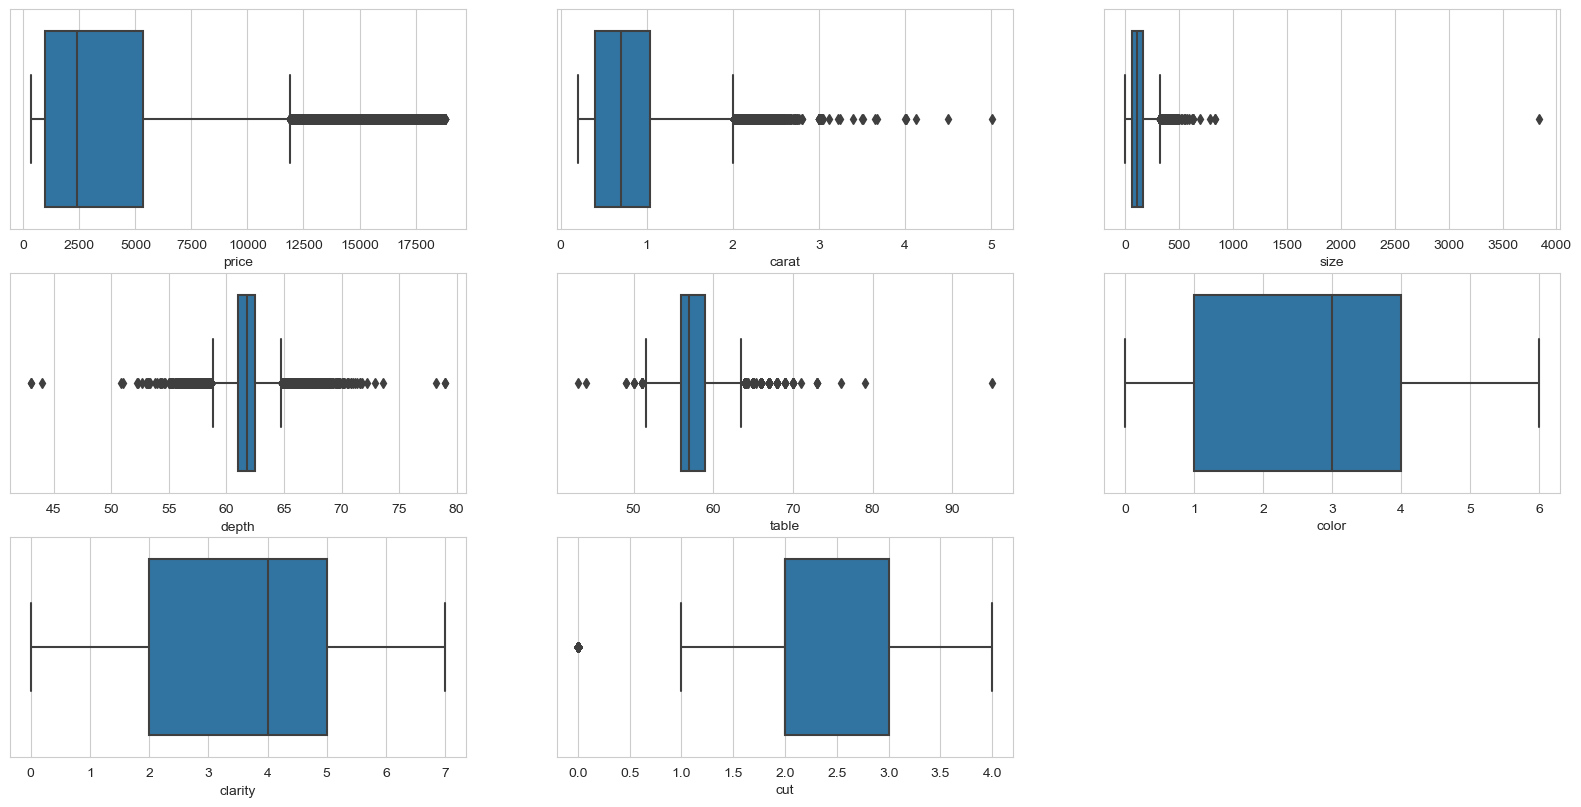

In [65]:
df.info()
df.columns
df.shape
df.dtypes
df.isnull().sum()
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

In [68]:
df.describe().T
#Check correlation between different features
df.corr()


,price,carat,size,depth,table,color,clarity,cut
price,1.000000,0.921591,0.902385,-0.010647,0.127134,0.172511,-0.071535,0.039860
carat,0.921591,1.000000,0.976308,0.028224,0.181618,0.291437,-0.214290,0.017124
size,0.902385,0.976308,1.000000,0.009157,0.167400,0.284267,-0.206632,0.021440
depth,-0.010647,0.028224,0.009157,1.000000,-0.295779,0.047279,-0.053080,-0.194249
table,0.127134,0.181618,0.167400,-0.295779,1.000000,0.026465,-0.088223,0.150327
color,0.172511,0.291437,0.284267,0.047279,0.026465,1.000000,-0.027795,0.000304
clarity,-0.071535,-0.214290,-0.206632,-0.053080,-0.088223,-0.027795,1.000000,0.028235
cut,0.039860,0.017124,0.021440,-0.194249,0.150327,0.000304,0.028235,1.000000


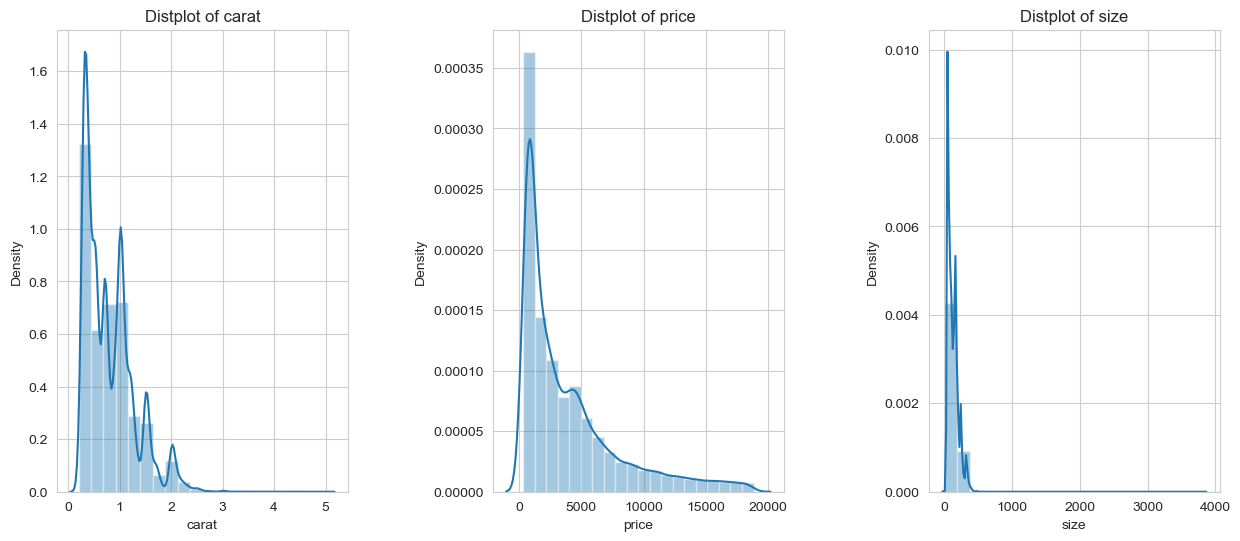

In [71]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['carat' , 'price' , 'size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

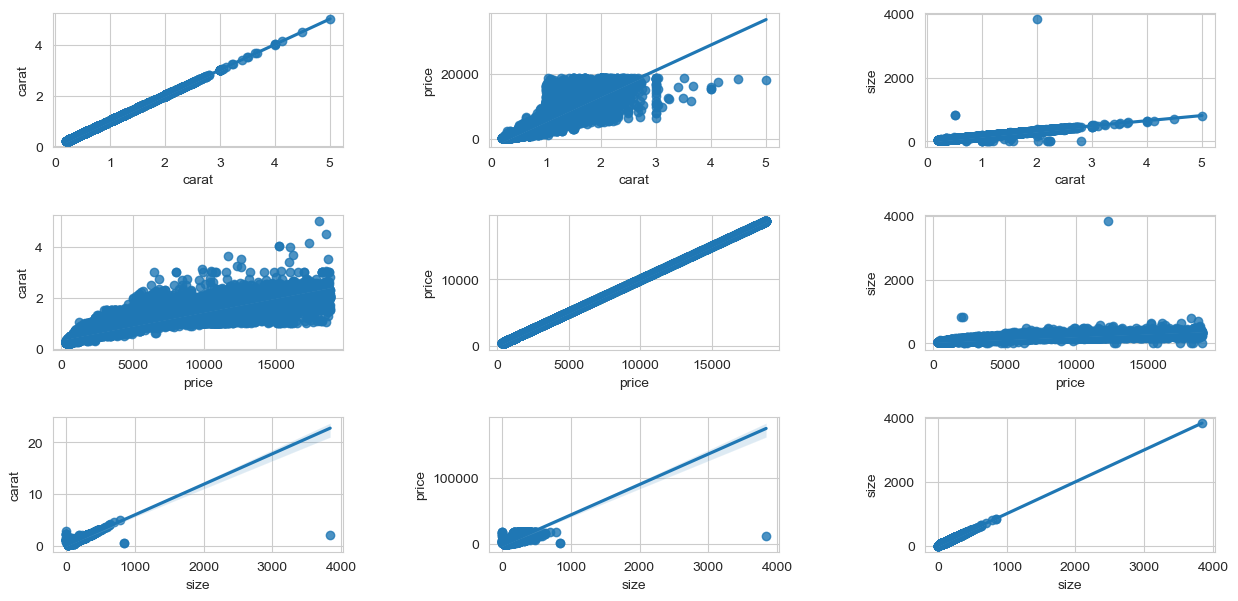

In [72]:
#Plot to see relationship between the features 'carat', 'price', 'size'
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['carat' , 'price' , 'size']:
    for y in ['carat' , 'price' , 'size']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [73]:
#Normalize the data and avoid the problem that generates outliers
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

In [74]:
df1 = pd.DataFrame(X_scaled) 

In [75]:
df1

,0,1,2,3,4,5,6,7
0,0.000000,0.006237,0.009947,0.513889,0.230769,0.166667,0.428571,0.50
1,0.000000,0.002079,0.008985,0.466667,0.346154,0.166667,0.285714,0.75
2,0.000054,0.006237,0.009914,0.386111,0.423077,0.166667,0.571429,0.25
3,0.000433,0.018711,0.012166,0.538889,0.288462,0.833333,0.714286,0.75
4,0.000487,0.022869,0.013518,0.563889,0.288462,1.000000,0.428571,0.25
...,...,...,...,...,...,...,...,...
53935,0.131427,0.108108,0.030183,0.494444,0.269231,0.000000,0.285714,0.50
53936,0.131427,0.108108,0.030753,0.558333,0.230769,0.000000,0.285714,0.25
53937,0.131427,0.103950,0.029800,0.550000,0.326923,0.000000,0.285714,1.00
53938,0.131427,0.137214,0.036652,0.500000,0.288462,0.666667,0.428571,0.75


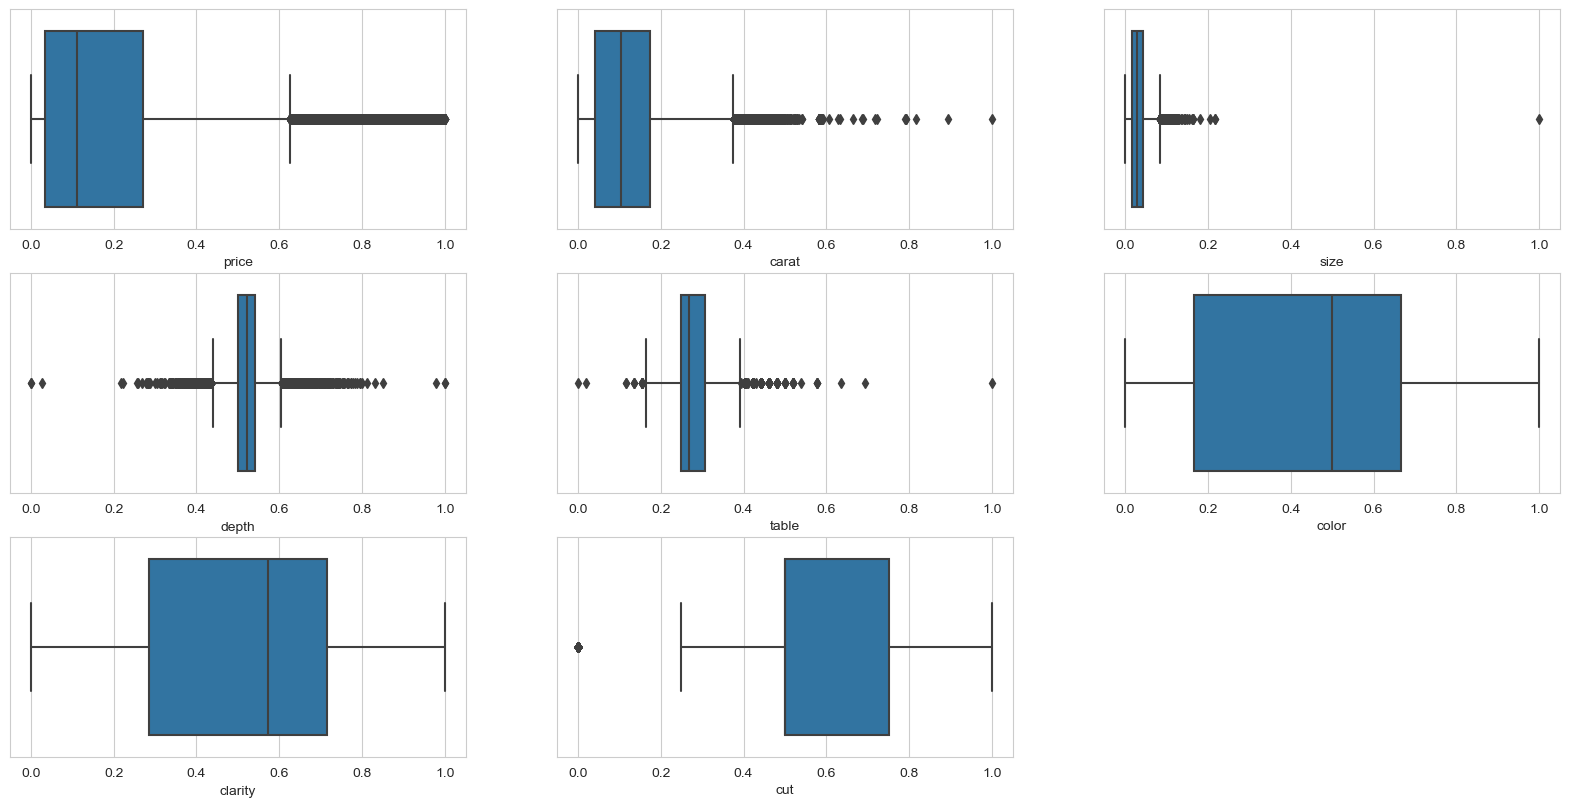

In [76]:
df1.columns
df1.columns =['price', 'carat', 'size', 'depth', 'table', 'color', 'clarity', 'cut']
df1.describe()
#Use boxplot to check numeric features again
fig = plt.figure(figsize=(20,20))
for col in range(len(df1.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df1.iloc[ : , col])
plt.show()

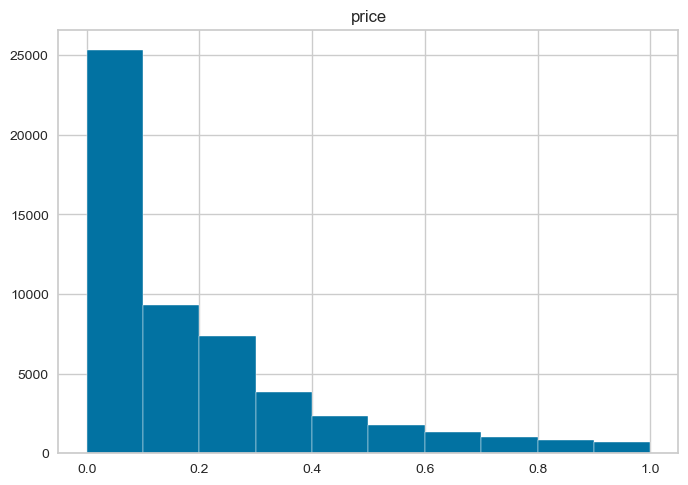

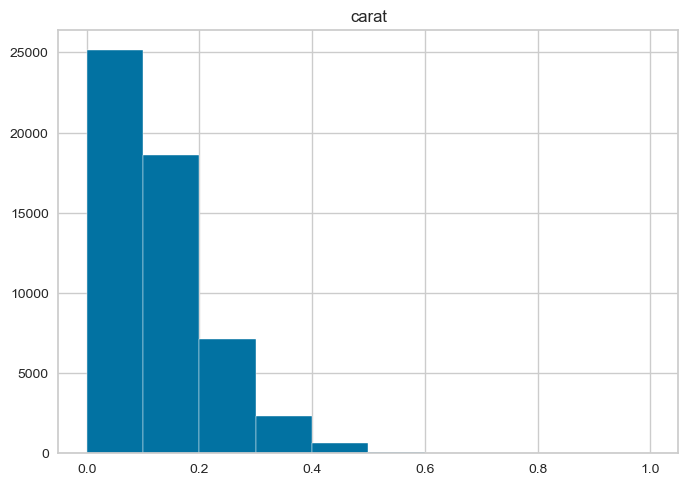

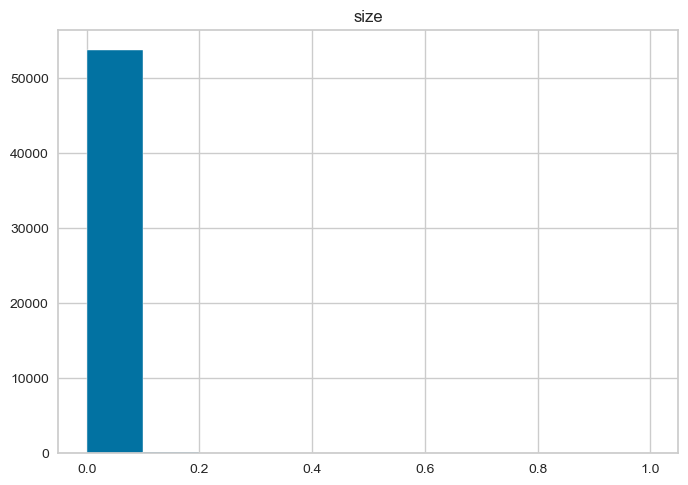

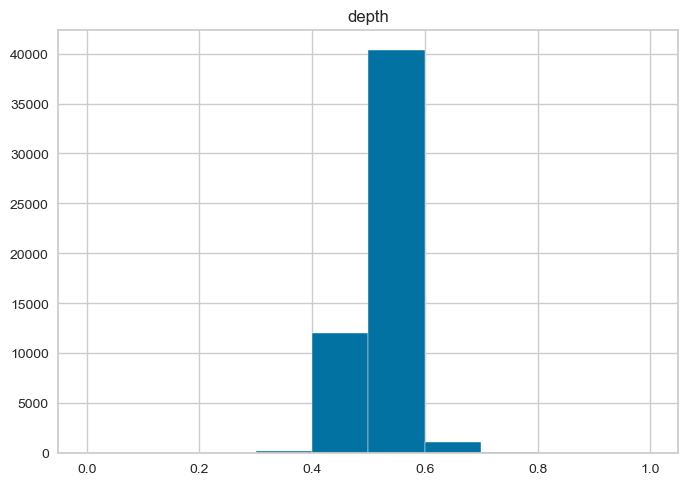

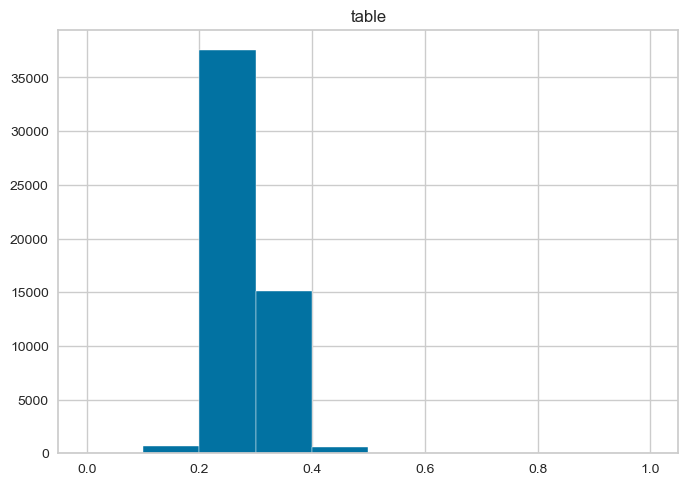

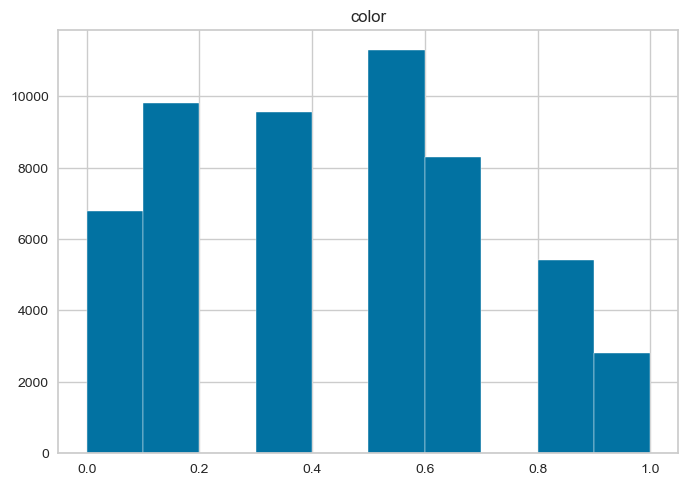

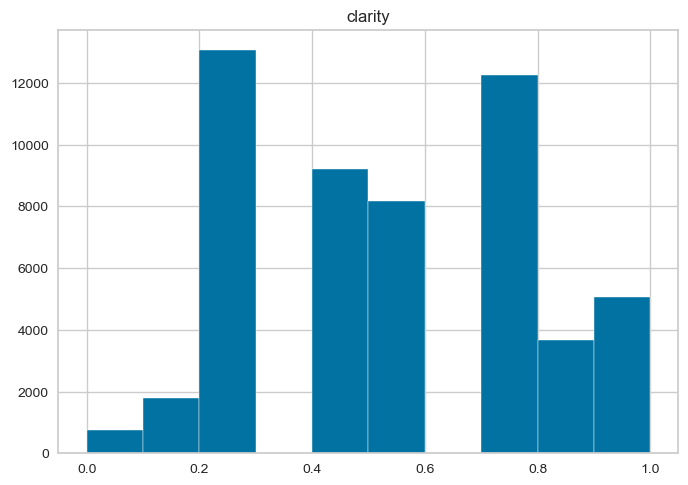

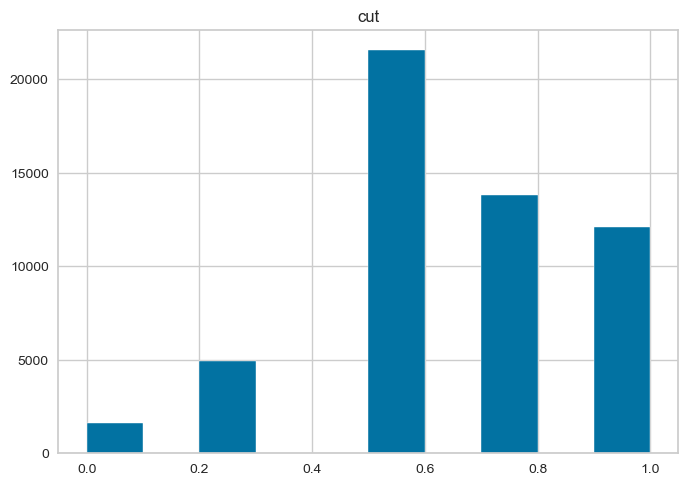

In [83]:
for col in df1:
    df1[[col]].hist()


In [90]:
# Create an instance of PCA
pca = PCA(n_components = 2) #Define n_components=2

pca.fit(df1)
df2 = pca.transform(df1)

In [91]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df1)
visualizer.show()
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [82]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

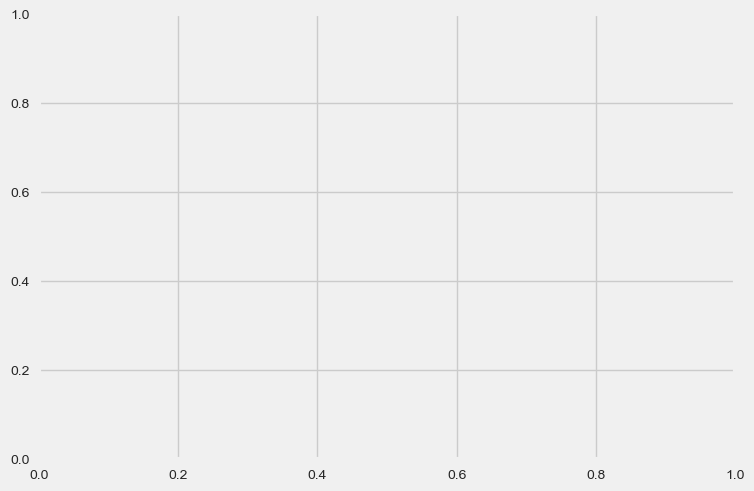

In [86]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [94]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

ValueError: x and y arrays must be equal in length along interpolation axis.

In [95]:
#Model building using KMeans
kmeans =  KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
kmeans.fit(df1)

AttributeError: 'NoneType' object has no attribute 'split'

In [96]:
#Use scatterplot to show clusters via PCA
plt.scatter(df2[:, 0], df2[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Diamonds clusters using KMEANS') 
plt.colorbar();


AttributeError: 'KMeans' object has no attribute 'labels_'

In [98]:
df1["cluster"] = kmeans.labels_.astype(float)
df1

AttributeError: 'KMeans' object has no attribute 'labels_'

In [99]:
# Number of clusters in labels, ignoring noise if present.
labels_kmeans = kmeans.labels_
n_clusters_ = len(set(labels_kmeans)) - (1 if -1 in labels_kmeans else 0)
n_noise_ = list(labels_kmeans).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [101]:
for c in df1:
    grid= sns.FacetGrid(df1, col='cluster')
    grid.map(plt.hist, c) 
kmeans=KMeans(5)
kmeans.fit_predict(df1)
y_pred = kmeans.predict(df1)
#preds = kmeans.labels_
data = pd.DataFrame(df)
data['cluster'] = y_pred
data.head(10)

KeyError: 'cluster'

In [102]:
#Use scatterplot to show clusters via KMEANS
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='carat',hue="cluster",data=data,palette='Paired_r')
plt.title('Diamonds clusters using KMEANS')
plt.show()

NameError: name 'data' is not defined

<Figure size 800x800 with 0 Axes>

# Using KNN Algorithm to predict if a person will have diabetes or not

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
data = pd.read_csv(r"C:\Users\djerb\Downloads\Diabetes\Diabetes\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [107]:
X = data.iloc[:,0:8]

In [108]:
y = data.iloc[:,8]

## Explorning data to know relation before processing

<Axes: >

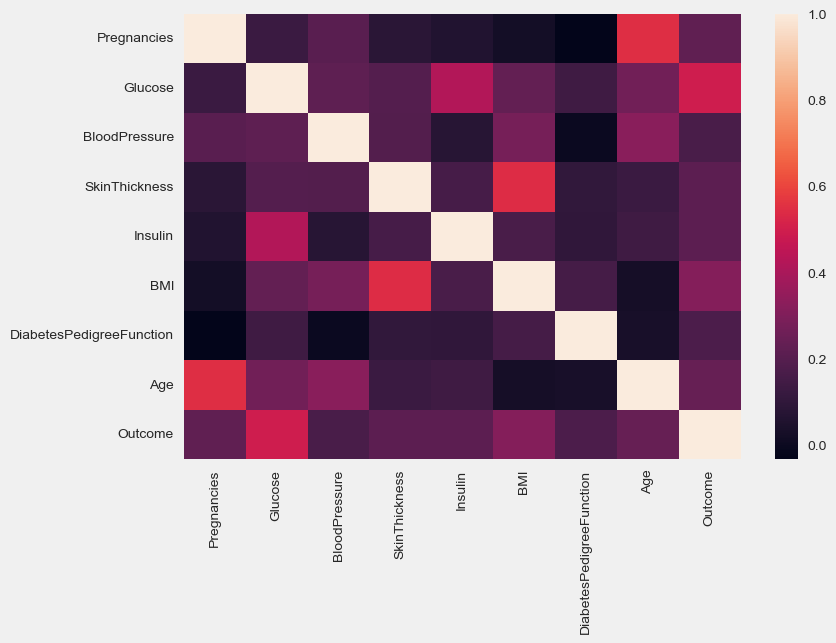

In [109]:
sns.heatmap(data.corr())

AttributeError: 'numpy.int64' object has no attribute 'startswith'

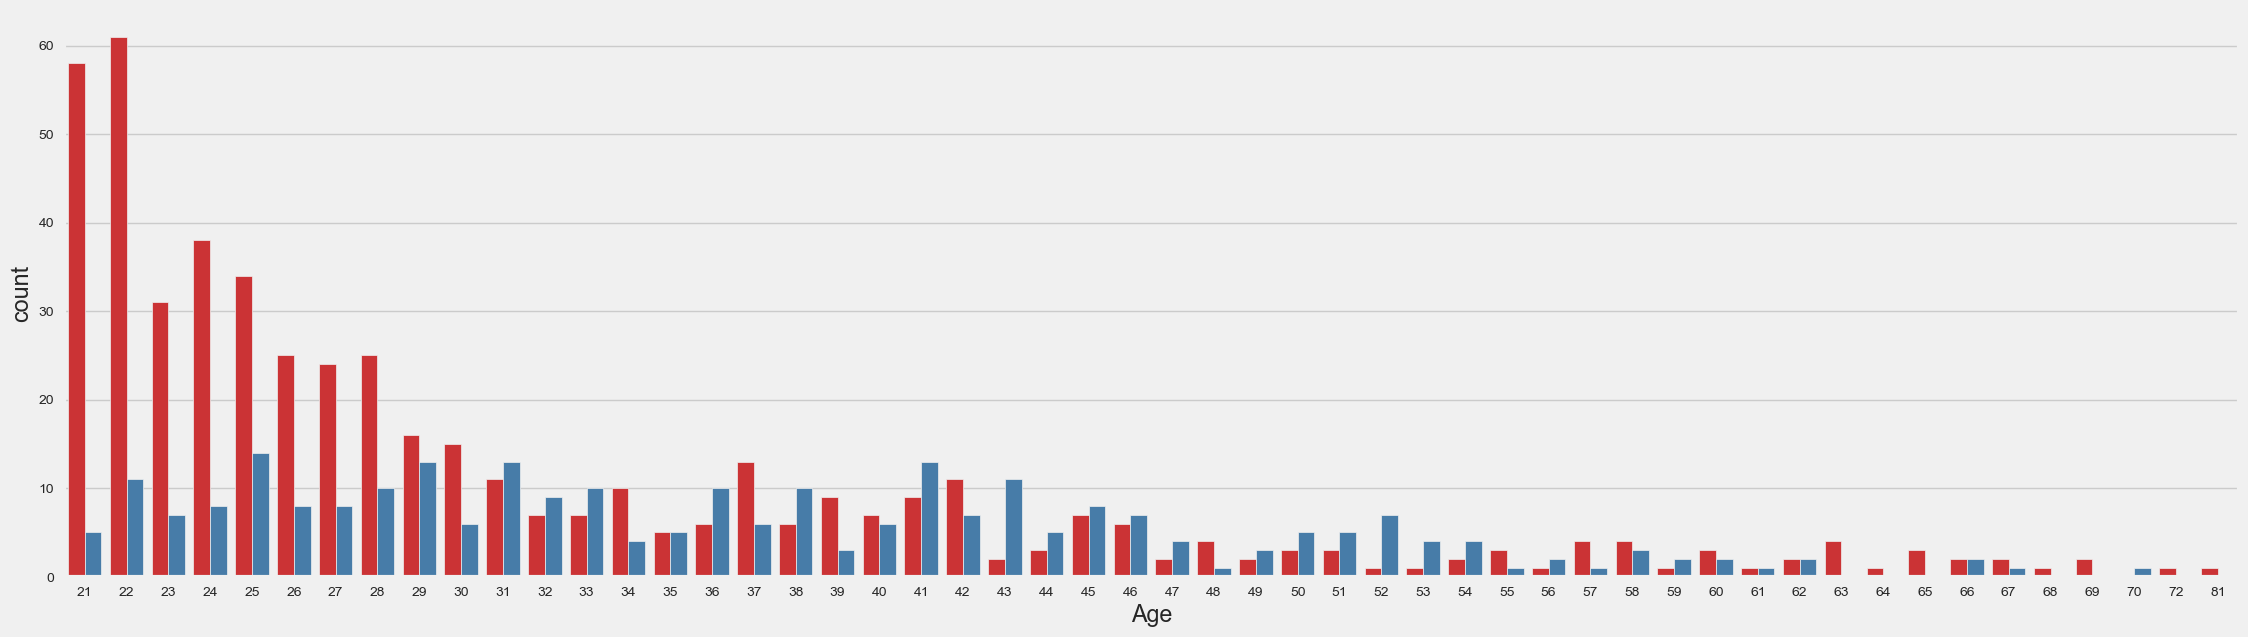

In [110]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [114]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [117]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
